# Hopfield network

Inmagine a series of binary neurons.

Suppose we have a binary vector, that corresponding to a memory pattern(like black-white image, capitcal city- country as ascii, etc). Hopfield net is a Ising model, that has local minimum at the positive samples.

$$x' = f(Wx)$$

W gather signals from x, and generate new x'. The sample is stable, that is to say x' and f(Wx) is close to each other, for instance, $||x' - f(Wx)||$ is small.

This similar a Ising model with $E(x) = -\frac{1}{2}x^TWx$. This function has minimum energy of Wx = x. The difference is, in Ising model, we know the W and thus able to find the energy minimum with MCMC, or sample at finite temperatue. However, in hopfield net, we only know the x that corresponding to local minimum, the goal is to find the proper W lead to energy minimum at the samples.

The algorithm for training a hopfield network:

training
1. W <- XTX initialize w by Hebb rule
2. for t in num sample, loop (label y)
3. calculate Wx
4. e = f(Wx) - y
5. grad = x^T e
6. gw = gw + gw^T
7. w = w + gw

inference
1. x_copt (corrupted sample)
2. loop t times:
3. x = f(Wx)
4. output x, recover input sample



# Hopfield Network 🧠

## Overview
A Hopfield network is a **content-addressable memory system** that stores binary patterns through **energy minimization**.

### 🔑 Key Properties:
- **Binary neurons** with **recurrent connections**
- **Energy-based** dynamics (`Ising model` analogy)
- **Associative memory** (recall from partial/noisy inputs)
- **Guaranteed convergence** to local minima

## Mathematical Formulation 🧮

### Network Dynamics
```math
\colorbox{#f0f8ff}{$x' = f(Wx)$}
```

Where:
- **`x`** = binary state vector (`[1, -1]` or `[0, 1]`)
- **`W`** = symmetric weight matrix (no self-connections: $W_{ii}=0$)
- **`f`** = activation function (typically $\text{sign}(\cdot)$)

### Energy Landscape ⚡
```math
\colorbox{#fff0f5}{$E(x) = -\frac{1}{2}x^TWx$}
```
**Stable states** satisfy: $\color{blue}{Wx \approx x}$

## Training Algorithm 🏋️ (Hebbian Learning)

```diff
+ 1. Initialize weights (Hebb's rule):
   W ← XᵀX (outer product of memory patterns)

+ 2. For each training sample y:
   - Compute: Wx
   - Error: e = f(Wx) - y
   - Gradient: ∇ = xᵀe
   - Symmetrize: gw += gwᵀ
   - Update: w += gw
```

## Inference Process 🔍

```python
1. Start with corrupted input x_corrupt
2. While not converged:
   x ← sign(Wx)  # Synchronous update
3. Output recovered pattern x
```

### 🎨 Key Differences: Ising vs Hopfield

| Feature        | Ising Model        | Hopfield Network  |
|----------------|--------------------|-------------------|
| **Known**      | Weight matrix W    | **Memory patterns x** |
| **Goal**       | Find minima        | **Learn W** for target minima |
| **Method**     | MCMC sampling      | **Hebbian learning**  |
```

### Visual Enhancements:
1. **Color boxes** around key equations
2. **Diff-style syntax** for algorithms
3. **Bold highlights** on key terms
4. **Emoji icons** for visual categorization
5. **Alternating background** in comparison table

Would you like me to:
1. Adjust the color scheme (currently light blue/pink)?
2. Add more visual elements like ASCII diagrams?
3. Include a concrete example with numbers?

In [1]:
# sample: Image 5 x 5 pixels, black and white
import numpy as np

# 修改正负
heart = np.array([
    [-1, 1, -1, 1, -1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [-1, 1, 1, 1, -1],
    [-1, -1, 1, -1, -1]
])

smile = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 1, -1, 1, -1],
    [-1, -1, -1, -1, -1],
    [1, -1, -1, -1, 1],
    [-1, 1, 1, 1, -1]
])
# 反片
heart = -heart
smile = -smile

X = np.array([heart.flatten(), smile.flatten()])  # training set

# initialized hopfield network

n_samples, d_x = X.shape

weights = np.zeros((d_x, d_x))
for x in X:
    weights += np.outer(x, x)
weights /= n_samples
np.fill_diagonal(weights, -1)

# training
#loops = 50
#for l in range(loops):
#    for x in X:
#        grad = np.sign(weights @ x) - x
#        weight += np.outer(grad, grad)

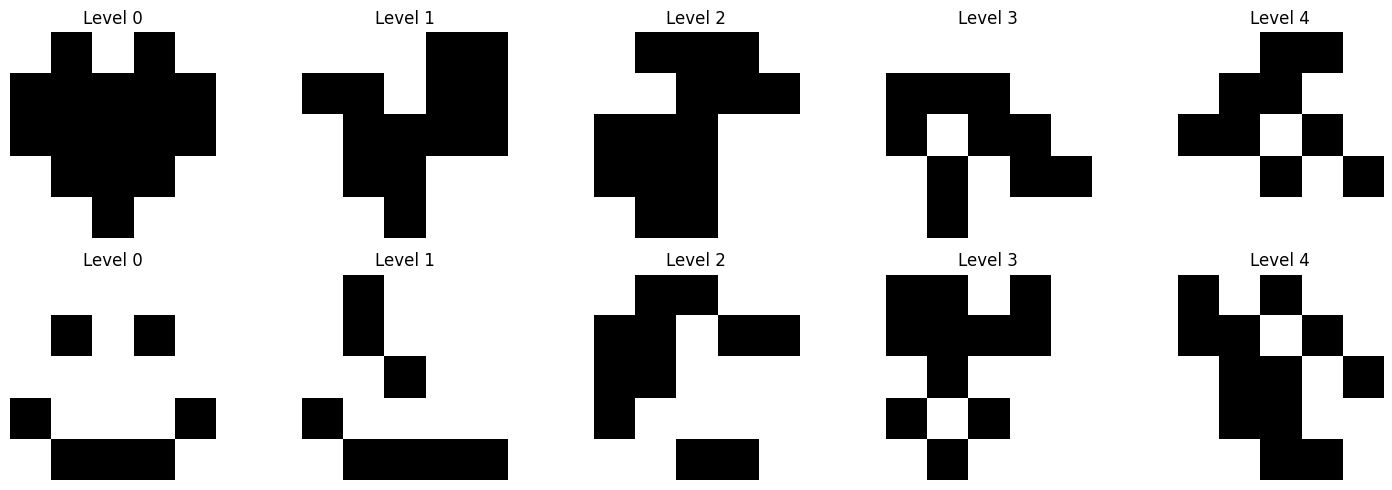

In [2]:
# add noise to input
noise_level = 5
noises = np.arange(0, len(X[0]), noise_level)
noises = np.array([0, 5, 8, 10, 11])
X_noises = [X.copy() for _ in range(len(noises))]

# randomly flip noise pixels
for x_noises, noise in zip(X_noises, noises):
    for x_noise in x_noises:
        noise_idx = np.random.choice(d_x, noise, replace=False)
        x_noise[noise_idx] *= -1

import matplotlib.pyplot as plt
# 创建2行6列的子图
fig, ax = plt.subplots(len(X_noises[0]), noise_level, figsize=(15, 5))

# 遍历每个样本（X[0]和X[1]）
for row in range(2):
    # 显示原始图像（噪声等级0）
    #ax[row, 0].imshow(X[row].reshape(5, 5), cmap='gray')
    #ax[row, 0].set_title(f"Level 0")
    #ax[row, 0].axis('off')
    # 显示5个噪声版本（噪声等级1~5）
    for col in range(noise_level):
        # 提取噪声图像
        noisy_img = X_noises[col][row].reshape(5, 5)
        ax[row, col].imshow(noisy_img, cmap='gray')
        ax[row, col].set_title(f"Level {col}")
        ax[row, col].axis('off')

plt.tight_layout()  # 自动调整子图间距
plt.show()


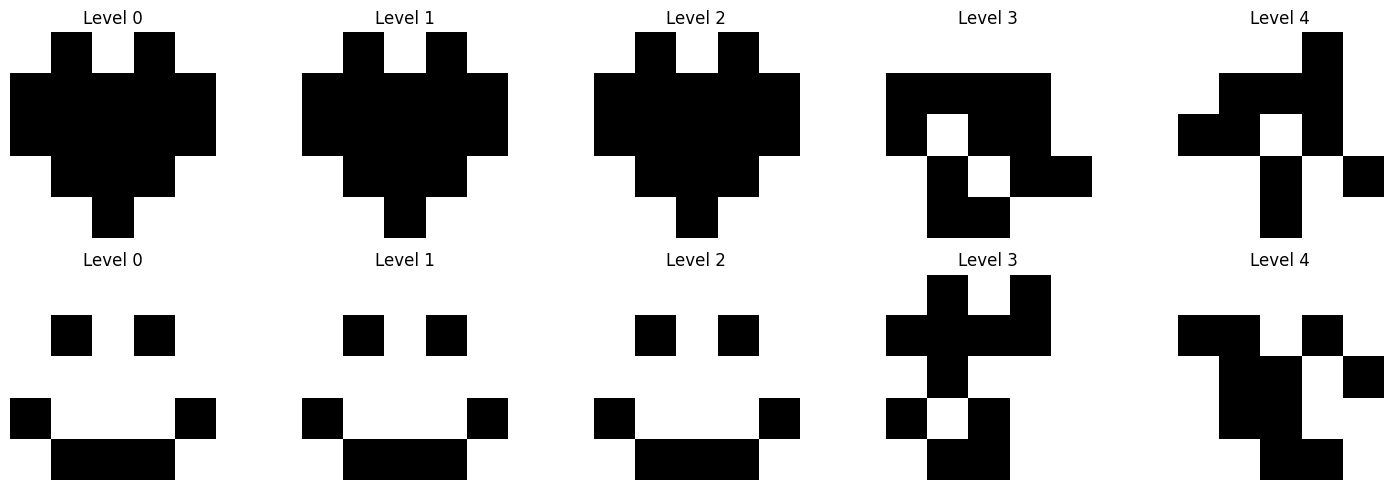

In [3]:
# 对所有sample去燥

def hopfield_denoise(x_noisy, weights, max_iter=100):
    x = x_noisy.copy()
    for i in range(n_samples):
        for _ in range(max_iter):
            x_next = np.sign(weights @ x)
            if np.all(x == x_next):
                break
            x = x_next
    return x

# solve all samples
X_denoised = [np.array([hopfield_denoise(x_noisy, weights) for x_noisy in X_noises[i]]) for i in range(len(noises))]


import matplotlib.pyplot as plt
# 创建2行6列的子图
fig, ax = plt.subplots(len(X_noises[0]), noise_level, figsize=(15, 5))
# 遍历每个样本（X[0]和X[1]）
for row in range(2):
    # 显示原始图像（噪声等级0）
    #x[row, 0].imshow(X[row].reshape(5, 5), cmap='gray')
    #ax[row, 0].set_title(f"Level 0")
    #ax[row, 0].axis('off')
    # 显示5个噪声版本（噪声等级1~5）
    for col in range(noise_level):
        # 提取噪声图像
        denoised_img = X_denoised[col][row].reshape(5, 5)
        ax[row, col].imshow(denoised_img, cmap='gray')
        ax[row, col].set_title(f"Level {col}")
        ax[row, col].axis('off')

plt.tight_layout()  # 自动调整子图间距
plt.show()



# bolzmann machine

## idea, biological illustration

Bolzmann machine is a neuron system with energy function based on each neuron activation(binary) and their connection.

$E(\bold{v}, \bold{h}) =  - \bold{v}^TR\bold{v} - \bold{v}^TW\bold{h} - \bold{h}^TS\bold{h} - b^T\bold{v} - c^T\bold{h}$

$v\in R^n$ and $h\in R^m$ are number of visible neuron and hidden neurons separately.

> *“fire together, wire together.”*
> 
> In bolzmann machine, connected neurons has wij > 0. 
